# Customer Personality Analysis

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("marketing_campaign.csv",sep= "\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.shape

(2240, 29)

In [5]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [11]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [8]:
df["Z_Revenue"].head(30)

0     11
1     11
2     11
3     11
4     11
5     11
6     11
7     11
8     11
9     11
10    11
11    11
12    11
13    11
14    11
15    11
16    11
17    11
18    11
19    11
20    11
21    11
22    11
23    11
24    11
25    11
26    11
27    11
28    11
29    11
Name: Z_Revenue, dtype: int64

In [9]:
df["Z_CostContact"].head(30)

0     3
1     3
2     3
3     3
4     3
5     3
6     3
7     3
8     3
9     3
10    3
11    3
12    3
13    3
14    3
15    3
16    3
17    3
18    3
19    3
20    3
21    3
22    3
23    3
24    3
25    3
26    3
27    3
28    3
29    3
Name: Z_CostContact, dtype: int64

In [10]:
#These 2 columns shows same data for all rows. so we can remove these 2 columns
df = df.drop(["Z_Revenue","Z_CostContact"],axis= 1)

In [11]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [12]:
df.shape

(2240, 27)

# Exploring Dataset

In [13]:
import  matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### EDA based on Education

In [14]:
edu_count = df.groupby("Education").count()["ID"]
edu_count

Education
2n Cycle       203
Basic           54
Graduation    1127
Master         370
PhD            486
Name: ID, dtype: int64

In [15]:
edu_count.index

Index(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], dtype='object', name='Education')

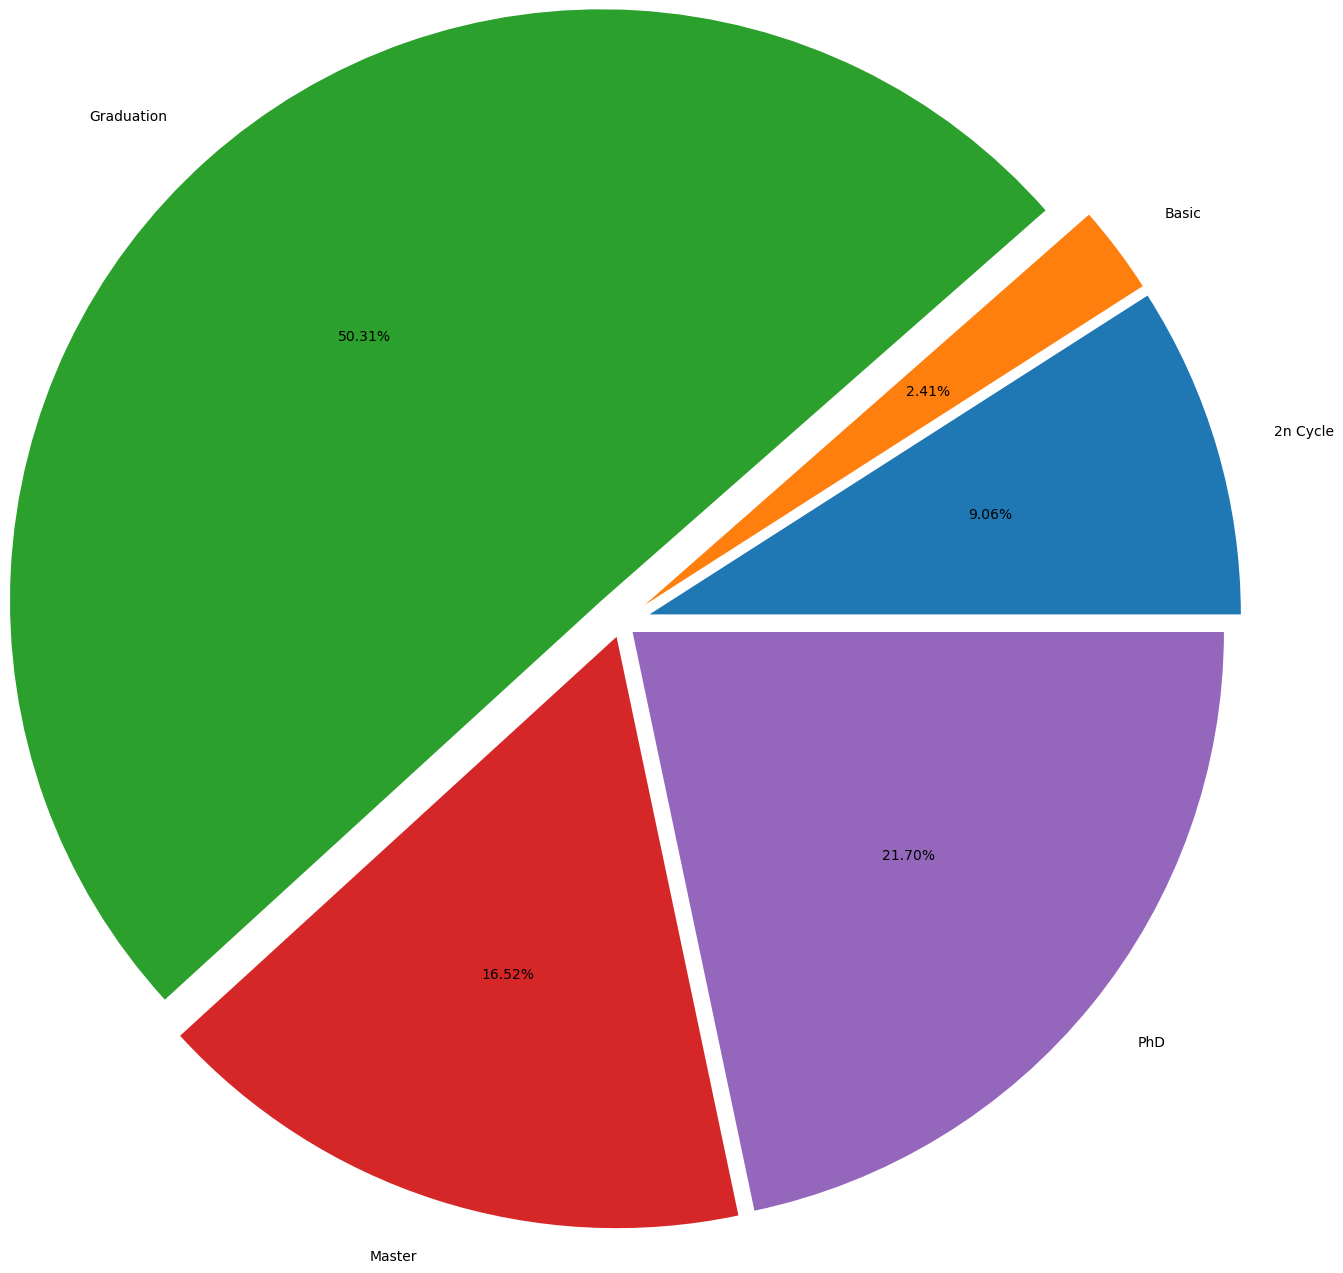

In [16]:
plt.axis("equal")
plt.pie(edu_count,labels= edu_count.index,autopct="%1.2f%%",radius=4,explode=[0.2,0.2,0.2,0.1,0.1])
plt.show()

Observation:

Here We found that more than 50% Customers with Graduation and only 11.47% below Graduation

In [17]:
amnt_wine = df.groupby("Education").mean()["MntWines"]
amnt_wine

/var/folders/v5/ls97yl7n7d5c_101lnk76gl00000gn/T/ipykernel_27708/2678362542.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  amnt_wine = df.groupby("Education").mean()["MntWines"]


Education
2n Cycle      198.182266
Basic           7.240741
Graduation    284.268855
Master        333.075676
PhD           404.495885
Name: MntWines, dtype: float64

In [18]:
amnt_fruits = df.groupby("Education").mean()["MntFruits"]
amnt_fruits

/var/folders/v5/ls97yl7n7d5c_101lnk76gl00000gn/T/ipykernel_27708/4026920325.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  amnt_fruits = df.groupby("Education").mean()["MntFruits"]


Education
2n Cycle      28.955665
Basic         11.111111
Graduation    30.774623
Master        21.654054
PhD           20.049383
Name: MntFruits, dtype: float64

In [19]:
#Average Spending on Meat Products
amnt_meat=df.groupby("Education").mean()['MntMeatProducts']
amnt_meat

/var/folders/v5/ls97yl7n7d5c_101lnk76gl00000gn/T/ipykernel_27708/184219308.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  amnt_meat=df.groupby("Education").mean()['MntMeatProducts']


Education
2n Cycle      141.256158
Basic          11.444444
Graduation    179.488909
Master        163.378378
PhD           168.602881
Name: MntMeatProducts, dtype: float64

In [20]:
#Average Spending on Fish Products
amnt_fish=df.groupby("Education").mean()['MntFishProducts']
amnt_fish 

/var/folders/v5/ls97yl7n7d5c_101lnk76gl00000gn/T/ipykernel_27708/904143974.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  amnt_fish=df.groupby("Education").mean()['MntFishProducts']


Education
2n Cycle      47.482759
Basic         17.055556
Graduation    43.149956
Master        32.100000
PhD           26.728395
Name: MntFishProducts, dtype: float64

In [21]:
#Average Spending on Sweet Products
amnt_sweet=df.groupby("Education").mean()['MntSweetProducts']
amnt_sweet

/var/folders/v5/ls97yl7n7d5c_101lnk76gl00000gn/T/ipykernel_27708/1439265360.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  amnt_sweet=df.groupby("Education").mean()['MntSweetProducts']


Education
2n Cycle      34.251232
Basic         12.111111
Graduation    31.367347
Master        21.175676
PhD           20.222222
Name: MntSweetProducts, dtype: float64

In [22]:
#Average Spending on Gold Products
amnt_gold=df.groupby("Education").mean()['MntGoldProds']
amnt_gold

/var/folders/v5/ls97yl7n7d5c_101lnk76gl00000gn/T/ipykernel_27708/2956183827.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  amnt_gold=df.groupby("Education").mean()['MntGoldProds']


Education
2n Cycle      46.399015
Basic         22.833333
Graduation    50.849157
Master        40.397297
PhD           32.310700
Name: MntGoldProds, dtype: float64

In [23]:
xpos = np.arange(5)
xpos

array([0, 1, 2, 3, 4])

In [24]:
label = edu_count.index

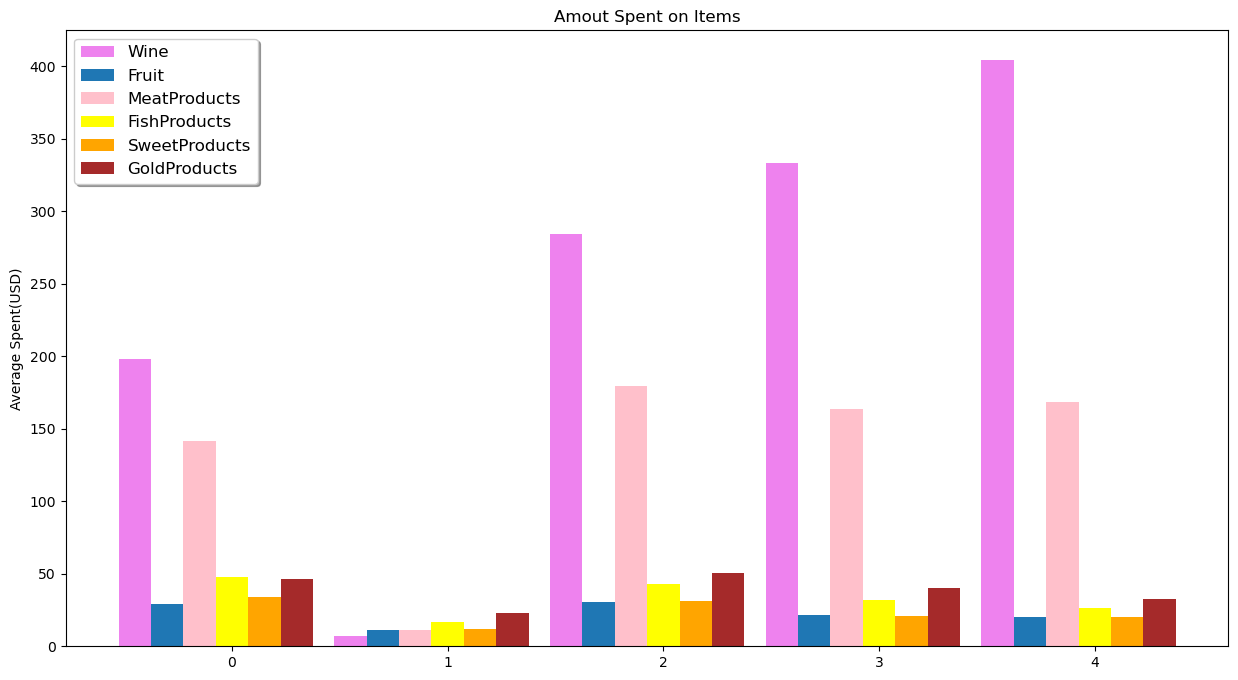

In [25]:
plt.figure(figsize=(15,8))
plt.bar(xpos-0.45,amnt_wine,width=0.15, label="Wine",color='violet')
plt.bar(xpos-0.3,amnt_fruits,width=0.15,label="Fruit")
plt.bar(xpos-0.15,amnt_meat,width=0.15,label="MeatProducts",color='pink')
plt.bar(xpos,amnt_fish,width=0.15,label="FishProducts",color='yellow')
plt.bar(xpos+0.15,amnt_sweet,width=0.15,label="SweetProducts",color='orange')
plt.bar(xpos+0.3,amnt_gold,width=0.15,label="GoldProducts",color='brown')

plt.xticks(xpos,)
plt.ylabel("Average Spent(USD)")
plt.title('Amout Spent on Items')
plt.legend(loc='upper left',shadow=True,fontsize='large')

Observation:

Here we found that More Educated people spending more on wines!! In case of Fruits We can't find big variation. In case of Meat Products also not that much variation based on education. Compared to others People with only Basic Education spent very less on all items. It may be due to their less income. Fruit,Fish,Sweet and Gold spent more in 2nd Cycle and Graduated People. Top spending item is Wine then Meat Products.

### 2: EDA based on No of Kids

In [26]:
cust_count1=df.groupby("Kidhome").count()['ID']
cust_count1

Kidhome
0    1293
1     899
2      48
Name: ID, dtype: int64

In [27]:
label1=df.groupby('Kidhome').count()['ID'].index
label1

Int64Index([0, 1, 2], dtype='int64', name='Kidhome')

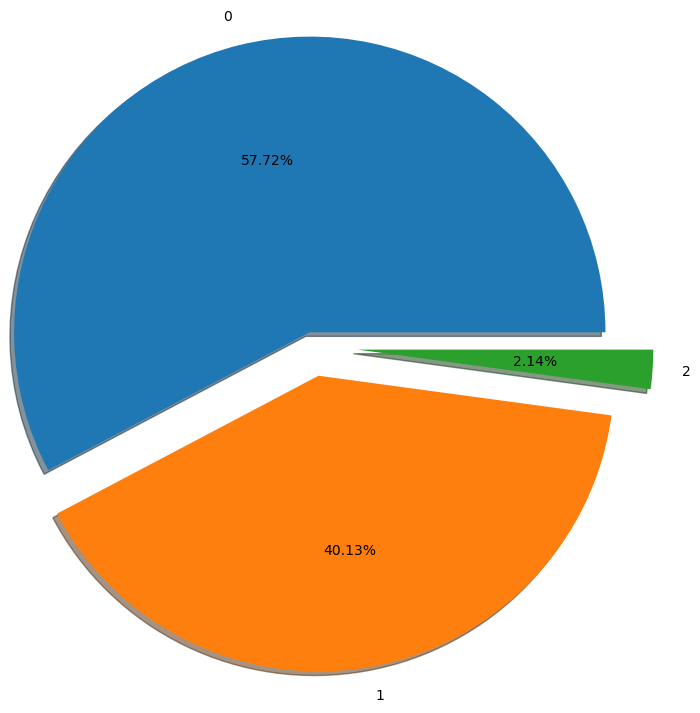

In [28]:
plt.axis("equal")
plt.pie(cust_count1,labels=label1, shadow=True, autopct='%1.2f%%',radius=2,explode=[0.1,0.2,0.3,])
plt.show()

Observation:

Most of the customers (ie nearly 60%) have no Kids at home

In [29]:
#Average Spending on Wines
wine_spent=df.groupby("Kidhome").mean()['MntWines']
wine_spent

/var/folders/v5/ls97yl7n7d5c_101lnk76gl00000gn/T/ipykernel_27708/235146537.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wine_spent=df.groupby("Kidhome").mean()['MntWines']


Kidhome
0    451.173241
1    104.403782
2     74.791667
Name: MntWines, dtype: float64

In [30]:
#Average Spending on Fruits
fruit_spent=df.groupby("Kidhome").mean()['MntFruits']
fruit_spent


/var/folders/v5/ls97yl7n7d5c_101lnk76gl00000gn/T/ipykernel_27708/2626740019.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fruit_spent=df.groupby("Kidhome").mean()['MntFruits']


Kidhome
0    39.392885
1     8.517241
2     6.770833
Name: MntFruits, dtype: float64

In [31]:
#Average Spending on Meat Products
meat_spent=df.groupby("Kidhome").mean()['MntMeatProducts']
meat_spent

/var/folders/v5/ls97yl7n7d5c_101lnk76gl00000gn/T/ipykernel_27708/666369782.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meat_spent=df.groupby("Kidhome").mean()['MntMeatProducts']


Kidhome
0    253.996133
1     48.862069
2     33.833333
Name: MntMeatProducts, dtype: float64

In [32]:
#Average Spending on Fish Products
fish_spent=df.groupby("Kidhome").mean()['MntFishProducts']
fish_spent

/var/folders/v5/ls97yl7n7d5c_101lnk76gl00000gn/T/ipykernel_27708/3451785437.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fish_spent=df.groupby("Kidhome").mean()['MntFishProducts']


Kidhome
0    56.162413
1    12.311457
2     7.729167
Name: MntFishProducts, dtype: float64

In [33]:
#Average Spending on Sweet Products
sweet_spent=df.groupby("Kidhome").mean()['MntSweetProducts']
sweet_spent

/var/folders/v5/ls97yl7n7d5c_101lnk76gl00000gn/T/ipykernel_27708/1629495946.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sweet_spent=df.groupby("Kidhome").mean()['MntSweetProducts']


Kidhome
0    40.498840
1     8.932147
2     4.708333
Name: MntSweetProducts, dtype: float64

In [34]:
#Average Spending on Gold Products
gold_spent=df.groupby("Kidhome").mean()['MntGoldProds']
gold_spent

/var/folders/v5/ls97yl7n7d5c_101lnk76gl00000gn/T/ipykernel_27708/3430779759.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gold_spent=df.groupby("Kidhome").mean()['MntGoldProds']


Kidhome
0    60.037123
1    22.408231
2    17.416667
Name: MntGoldProds, dtype: float64

In [35]:
xpos1 = np.arange(len(label1))
xpos1

array([0, 1, 2])

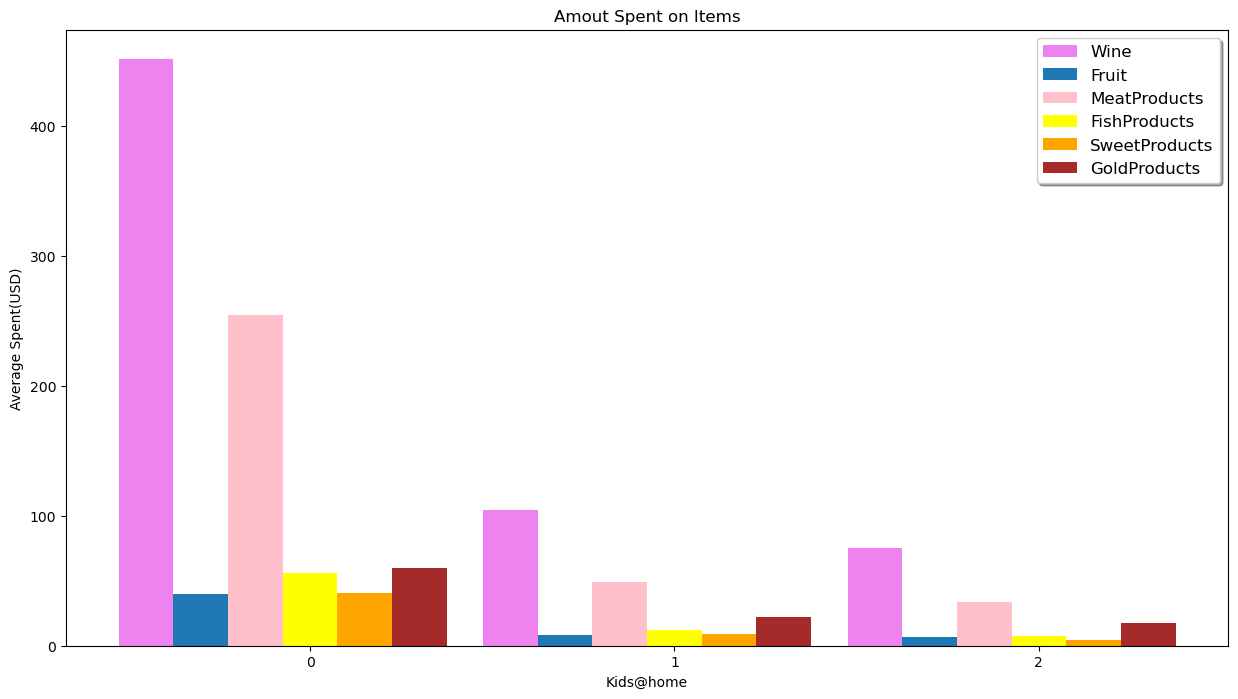

In [36]:
plt.figure(figsize=(15,8))
plt.bar(xpos1-0.45,wine_spent,width=0.15, label="Wine",color='violet')
plt.bar(xpos1-0.3,fruit_spent,width=0.15,label="Fruit")
plt.bar(xpos1-0.15,meat_spent,width=0.15,label="MeatProducts",color='pink')
plt.bar(xpos1,fish_spent,width=0.15,label="FishProducts",color='yellow')
plt.bar(xpos1+0.15,sweet_spent,width=0.15,label="SweetProducts",color='orange')
plt.bar(xpos1+0.3,gold_spent,width=0.15,label="GoldProducts",color='brown')

plt.xticks(xpos1,label1)
plt.xlabel('Kids@home')
plt.ylabel("Average Spent(USD)")
plt.title('Amout Spent on Items')
plt.legend(shadow=True,fontsize='large')

Observation:

People with no children at home spent very much compared to others

### 3: EDA based on Marital Status

In [37]:
cust_count1=df.groupby("Marital_Status").count()['ID']
cust_count1

Marital_Status
Absurd        2
Alone         3
Divorced    232
Married     864
Single      480
Together    580
Widow        77
YOLO          2
Name: ID, dtype: int64

In [38]:
label2=df.groupby('Marital_Status').count()['ID'].index
label2

Index(['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together', 'Widow',
       'YOLO'],
      dtype='object', name='Marital_Status')

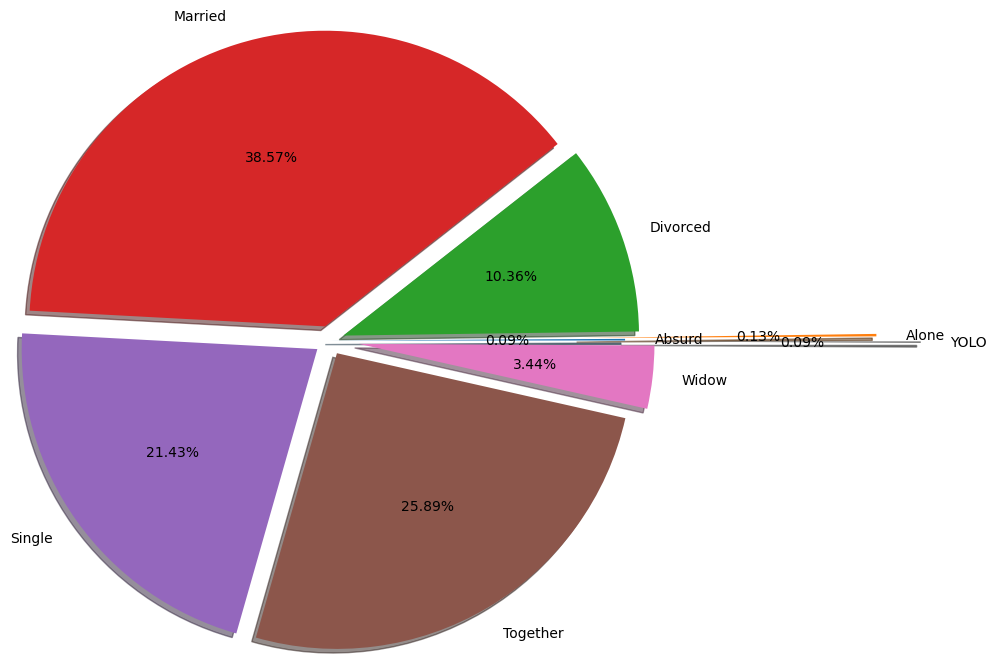

In [39]:
plt.axis("equal")
plt.pie(cust_count1,labels=label2, shadow=True, autopct='%1.2f%%',radius=2,explode=[0,1.7,0.1,0.1,0.1,0.1,0.2,2])
plt.show()

In [40]:
#Average Spending on Wines
wine_spent2=df.groupby("Marital_Status").mean()['MntWines']
wine_spent2

/var/folders/v5/ls97yl7n7d5c_101lnk76gl00000gn/T/ipykernel_27708/195325533.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wine_spent2=df.groupby("Marital_Status").mean()['MntWines']


Marital_Status
Absurd      355.500000
Alone       184.666667
Divorced    324.844828
Married     299.480324
Single      288.331250
Together    306.825862
Widow       369.272727
YOLO        322.000000
Name: MntWines, dtype: float64

In [41]:
#Average Spending on Fruits
fruit_spent2=df.groupby("Marital_Status").mean()['MntFruits']
fruit_spent2



/var/folders/v5/ls97yl7n7d5c_101lnk76gl00000gn/T/ipykernel_27708/3314819157.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fruit_spent2=df.groupby("Marital_Status").mean()['MntFruits']


Marital_Status
Absurd      84.500000
Alone        4.000000
Divorced    27.426724
Married     25.734954
Single      26.835417
Together    25.350000
Widow       33.090909
YOLO         3.000000
Name: MntFruits, dtype: float64

In [42]:
#Average Spending on Meat Products
meat_spent2=df.groupby("Marital_Status").mean()['MntMeatProducts']
meat_spent2

/var/folders/v5/ls97yl7n7d5c_101lnk76gl00000gn/T/ipykernel_27708/4232795359.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meat_spent2=df.groupby("Marital_Status").mean()['MntMeatProducts']


Marital_Status
Absurd      312.500000
Alone        26.333333
Divorced    150.206897
Married     160.681713
Single      182.108333
Together    168.103448
Widow       189.285714
YOLO         50.000000
Name: MntMeatProducts, dtype: float64

In [43]:
#Average Spending on Fish Products
fish_spent2=df.groupby("Marital_Status").mean()['MntFishProducts']
fish_spent2

/var/folders/v5/ls97yl7n7d5c_101lnk76gl00000gn/T/ipykernel_27708/60448932.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fish_spent2=df.groupby("Marital_Status").mean()['MntFishProducts']


Marital_Status
Absurd      205.500000
Alone         7.666667
Divorced     35.043103
Married      35.380787
Single       38.216667
Together     38.991379
Widow        51.389610
YOLO          4.000000
Name: MntFishProducts, dtype: float64

In [44]:
#Average Spending on Sweet Products
sweet_spent2=df.groupby("Marital_Status").mean()['MntSweetProducts']
sweet_spent2

/var/folders/v5/ls97yl7n7d5c_101lnk76gl00000gn/T/ipykernel_27708/2773062824.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sweet_spent2=df.groupby("Marital_Status").mean()['MntSweetProducts']


Marital_Status
Absurd      30.500000
Alone        7.000000
Divorced    26.818966
Married     26.701389
Single      27.262500
Together    26.122414
Widow       39.012987
YOLO         3.000000
Name: MntSweetProducts, dtype: float64

In [45]:
#Average Spending on Gold Products
gold_spent2=df.groupby("Marital_Status").mean()['MntGoldProds']
gold_spent2

/var/folders/v5/ls97yl7n7d5c_101lnk76gl00000gn/T/ipykernel_27708/2619374563.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gold_spent2=df.groupby("Marital_Status").mean()['MntGoldProds']


Marital_Status
Absurd      204.000000
Alone        27.000000
Divorced     46.288793
Married      42.822917
Single       43.729167
Together     42.994828
Widow        56.766234
YOLO         42.000000
Name: MntGoldProds, dtype: float64

In [46]:
xpos2 = np.arange(len(label2))
xpos2

array([0, 1, 2, 3, 4, 5, 6, 7])

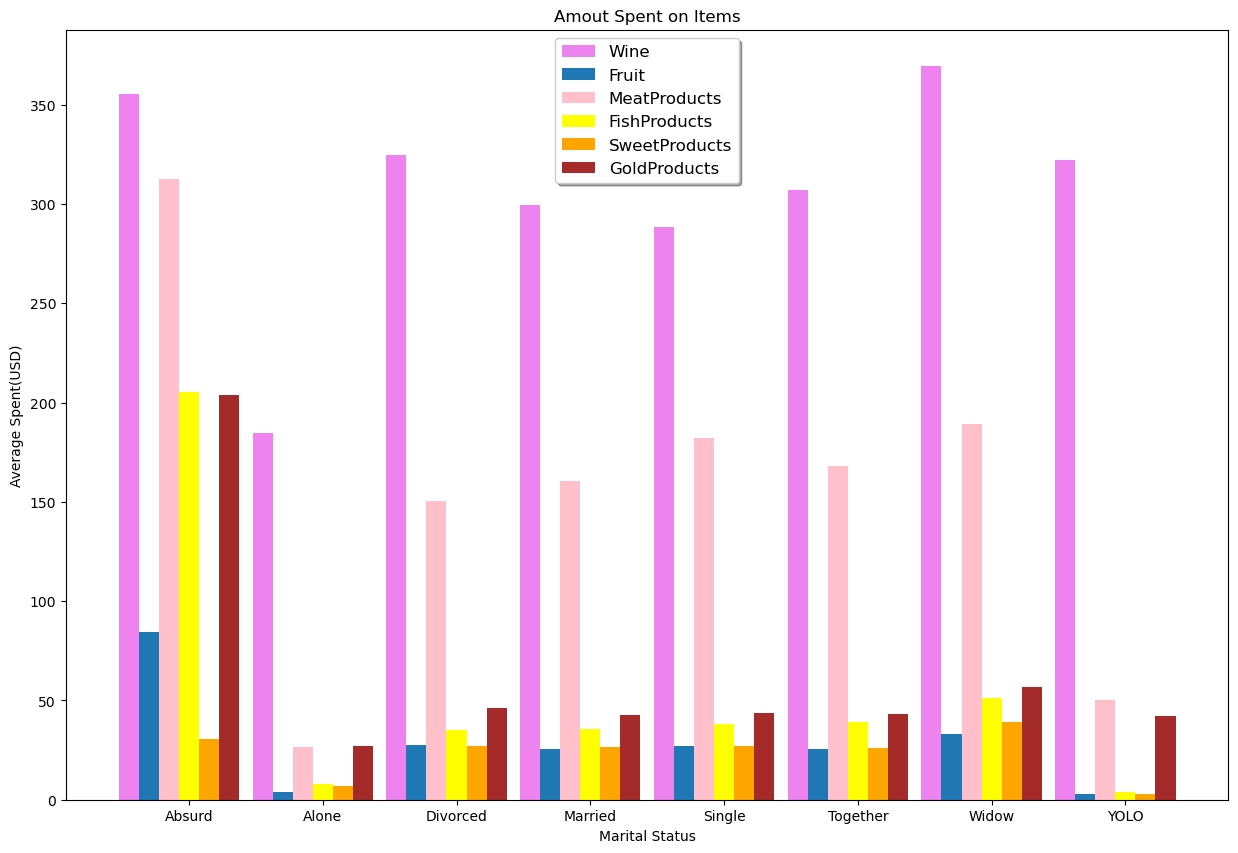

In [47]:
plt.figure(figsize=(15,10))
plt.bar(xpos2-0.45,wine_spent2,width=0.15, label="Wine",color='violet')
plt.bar(xpos2-0.3,fruit_spent2,width=0.15,label="Fruit")
plt.bar(xpos2-0.15,meat_spent2,width=0.15,label="MeatProducts",color='pink')
plt.bar(xpos2,fish_spent2,width=0.15,label="FishProducts",color='yellow')
plt.bar(xpos2+0.15,sweet_spent2,width=0.15,label="SweetProducts",color='orange')
plt.bar(xpos2+0.3,gold_spent2,width=0.15,label="GoldProducts",color='brown')

plt.xticks(xpos2,label2)
plt.xlabel('Marital Status')
plt.ylabel("Average Spent(USD)")
plt.title('Amout Spent on Items')
plt.legend(loc='best',shadow=True,fontsize='large')

Observation:

In case of Absurd we can see Average spending very high compared to others. That may be due to very less sample data. There are only 2 customers in this class. So if one of them very lavish then it will effect result. So we cannot consder it as a common case

### 4: How diverse is the Age Group of Clients?

In [48]:
df['Age']=2021-df.Year_Birth.to_numpy()
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,4,7,0,0,0,0,0,0,1,64
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,5,0,0,0,0,0,0,0,67
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,10,4,0,0,0,0,0,0,0,56
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,4,6,0,0,0,0,0,0,0,37
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,6,5,0,0,0,0,0,0,0,40


In [49]:
cust_count3=df.groupby("Age").count()['ID']
cust_count3

Age
25      2
26      5
27      3
28      5
29     13
30     15
31     18
32     30
33     29
34     27
35     42
36     32
37     38
38     42
39     45
40     39
41     39
42     53
43     77
44     52
45     89
46     83
47     69
48     74
49     79
50     87
51     77
52     71
53     51
54     44
55     50
56     74
57     42
58     45
59     44
60     36
61     49
62     51
63     53
64     43
65     55
66     49
67     50
68     35
69     52
70     43
71     29
72     30
73     21
74     16
75     16
76      8
77      7
78      7
80      1
81      1
121     1
122     1
128     1
Name: ID, dtype: int64

In [50]:
label3=df.groupby('Age').count()['ID'].index
label3

Int64Index([ 25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
             38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
             51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
             64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
             77,  78,  80,  81, 121, 122, 128],
           dtype='int64', name='Age')

In [51]:
xpos3 = np.arange(len(label3))
xpos3

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58])

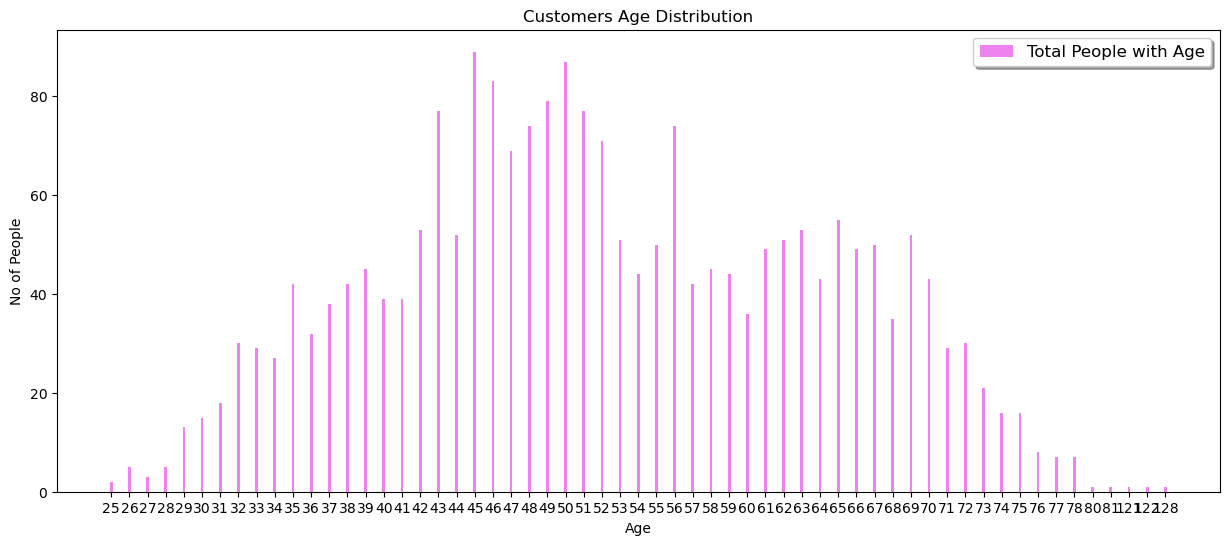

In [52]:
plt.figure(figsize=(15,6))
plt.bar(xpos3,width=0.15, label="Total People with Age",color='violet',height =cust_count3)

plt.xticks(xpos3,label3)
plt.xlabel('Age')
plt.ylabel("No of People")
plt.title('Customers Age Distribution')
plt.legend(loc='best',shadow=True,fontsize='large')

Observation:

Clearly we can see that most of the customers comes under the age between 35 and 70. While marketing we can consider this age group

### 5: How does Income depend on Education?

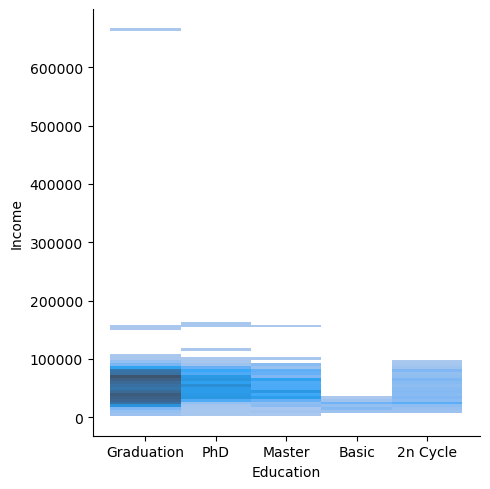

In [53]:
sns.displot(data=df, x="Education", y="Income")

Observation:

We can see that People having only Basic Education have very less income compared to all others

### 6: Correlation among all features¶

In [54]:
df.corr()

/var/folders/v5/ls97yl7n7d5c_101lnk76gl00000gn/T/ipykernel_27708/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
ID,1.000000,0.000028,0.013095,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,...,-0.014927,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,-0.021968,-0.000028
Year_Birth,0.000028,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,...,-0.128272,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,0.021325,-1.000000
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,...,0.529362,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,0.133047,0.161791
Kidhome,0.002406,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,...,-0.499683,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,-0.080008,-0.230176
Teenhome,-0.002580,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,...,0.050695,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,-0.154446,0.352111
Recency,-0.046524,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,...,0.000799,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,-0.198437,0.019871
MntWines,-0.022878,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,...,0.642100,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,0.247254,0.157773
MntFruits,0.004600,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,...,0.461758,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,0.125289,0.017917
MntMeatProducts,-0.004437,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,...,0.479659,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,0.236335,0.030872
MntFishProducts,-0.024475,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,...,0.459855,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,0.111331,0.041625


/var/folders/v5/ls97yl7n7d5c_101lnk76gl00000gn/T/ipykernel_27708/3388359473.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


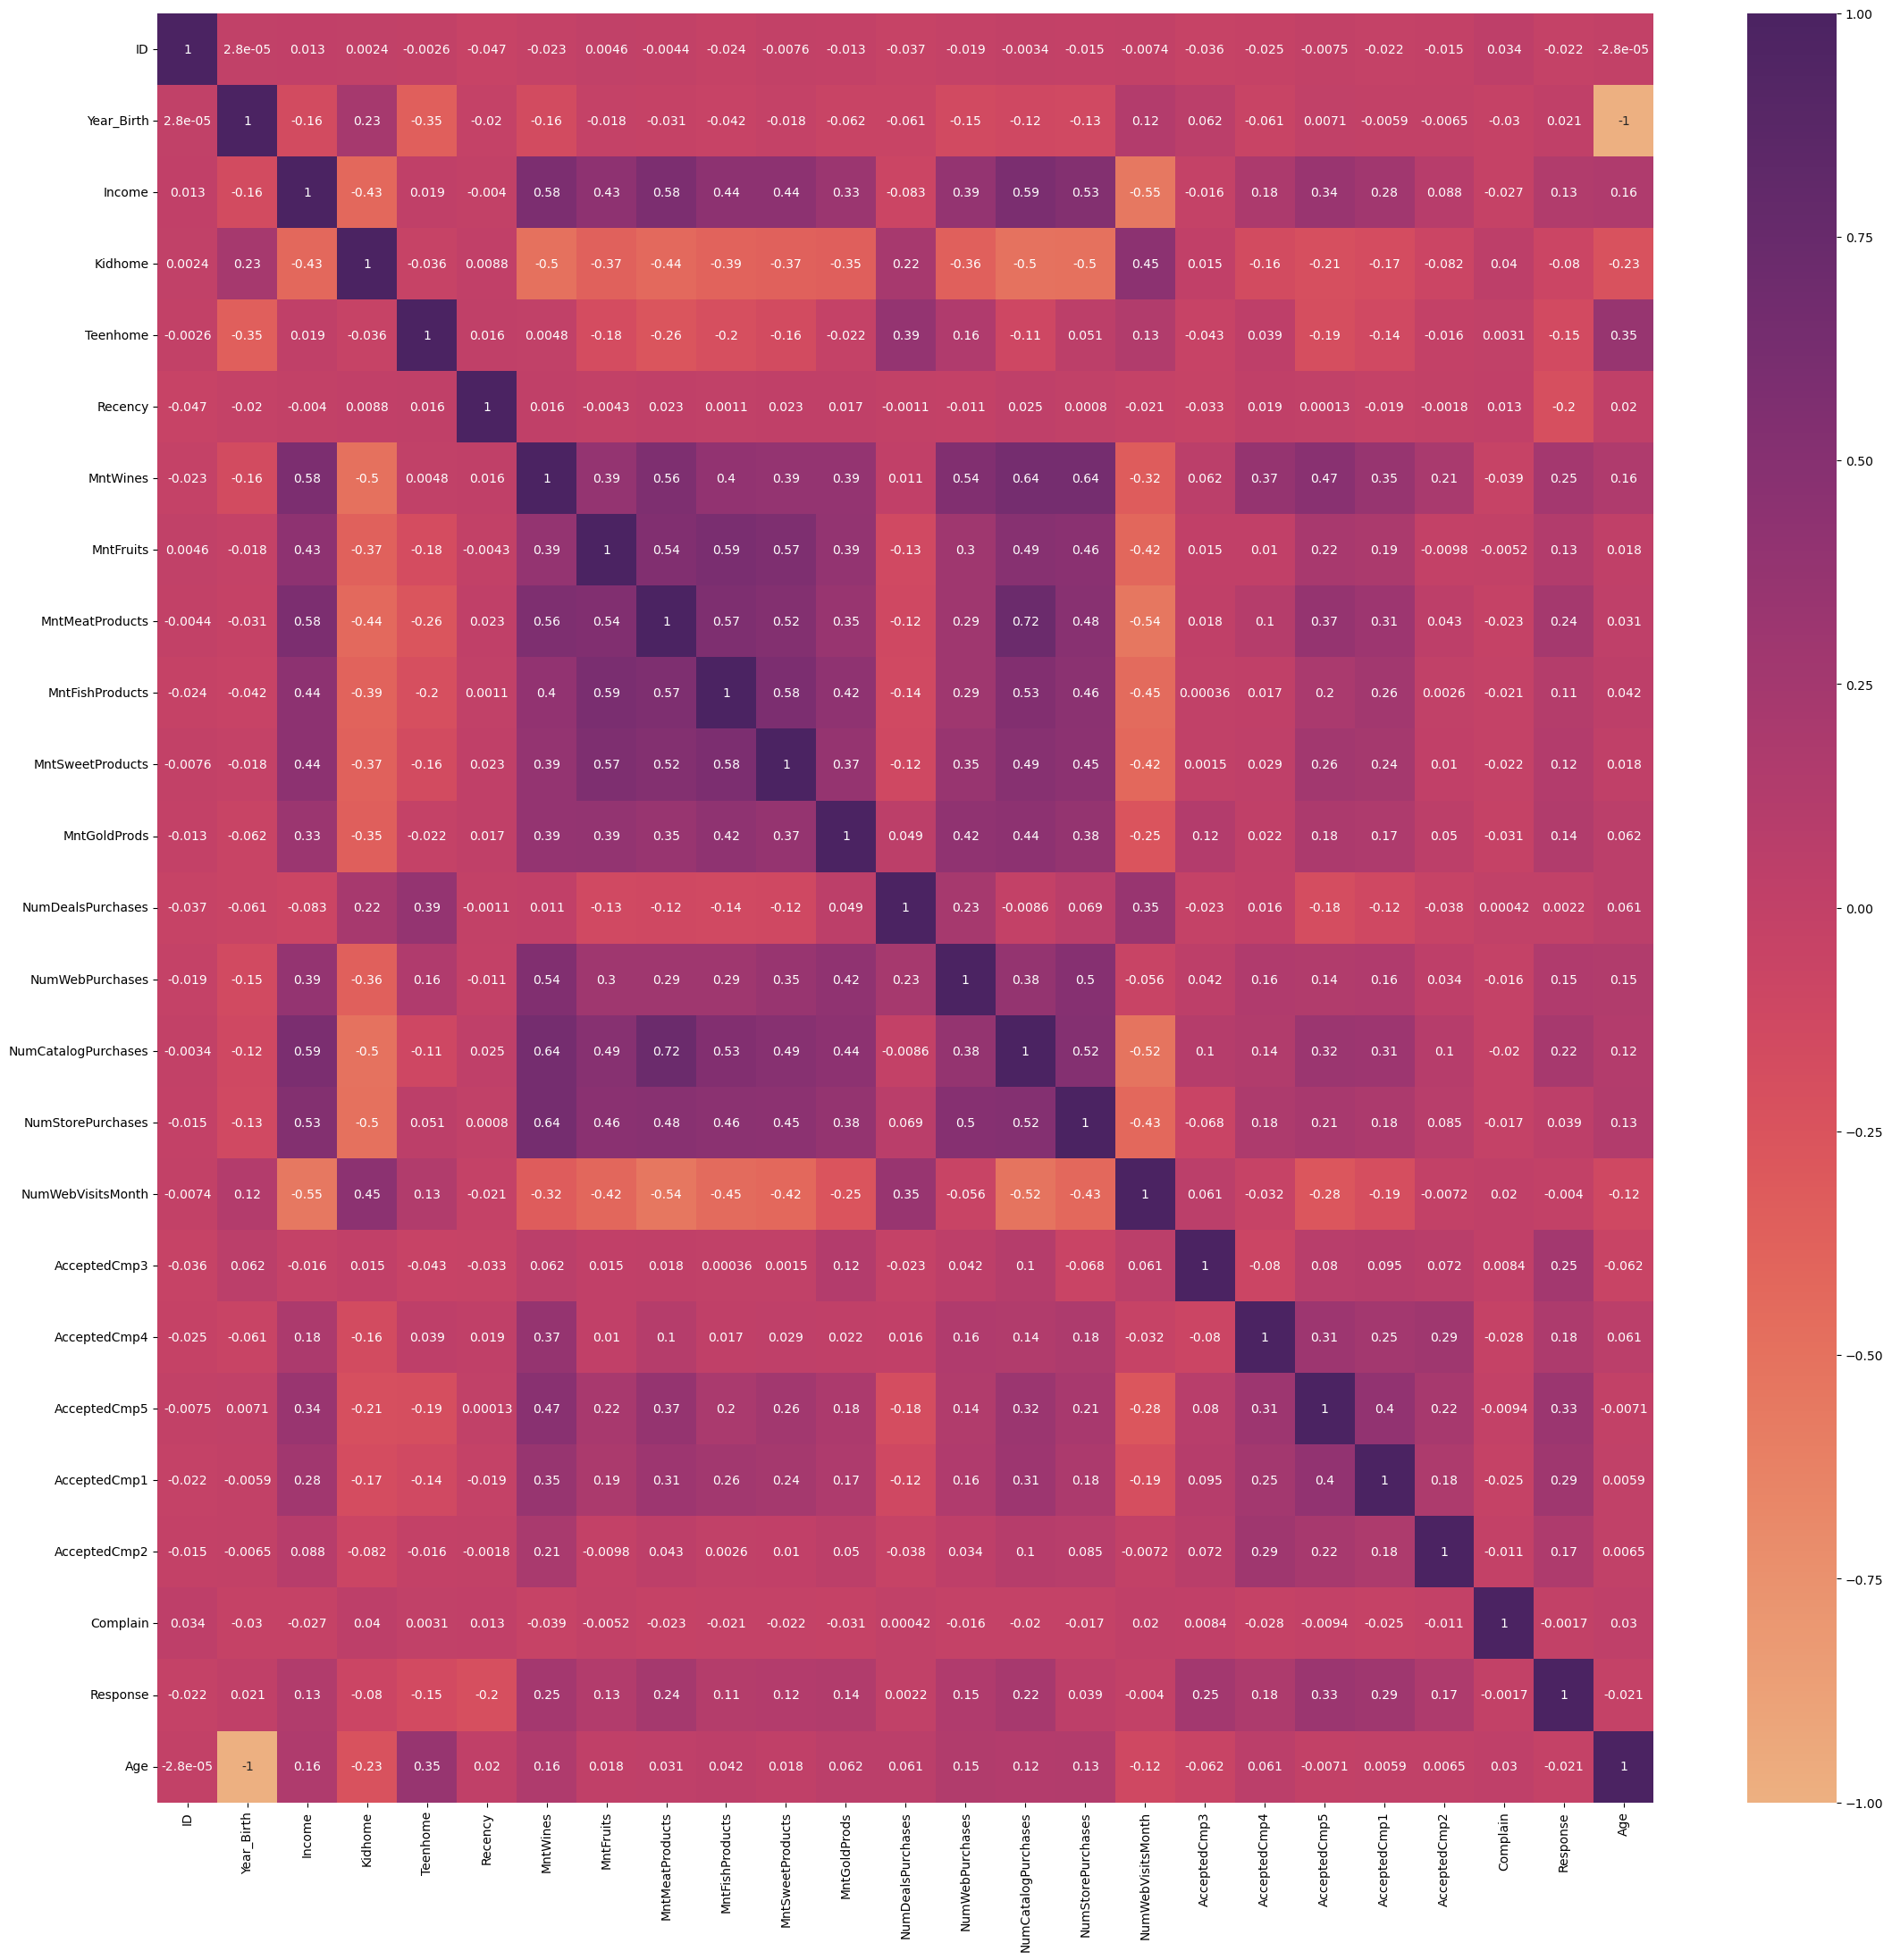

In [55]:
plt.figure(figsize = (27,26))
cor = df.corr()
sns.heatmap(cor, annot = True, cmap = 'flare')
plt.show()

## DATA PREPROCESSING


The following steps are applied to preprocess the data:

Label encoding the categorical features
Scaling the features using the standard scaler
Creating a subset dataframe for dimensionality reduction

In [56]:
#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)

In [57]:
#Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education']


In [58]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [59]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [60]:
df.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,2,58138.0,0,0,58,635,88,546,172,88,...,4,7,0,0,0,0,0,0,1,64
1,2,46344.0,1,1,38,11,1,6,2,1,...,2,5,0,0,0,0,0,0,0,67
2,2,71613.0,0,0,26,426,49,127,111,21,...,10,4,0,0,0,0,0,0,0,56
3,2,26646.0,1,0,26,11,4,20,10,3,...,4,6,0,0,0,0,0,0,0,37
4,4,58293.0,1,0,94,173,43,118,46,27,...,6,5,0,0,0,0,0,0,0,40


In [61]:
#Creating a copy of data
ds = df.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [62]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age
0,-0.350141,0.234063,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904,0.985345
1,-0.350141,-0.234559,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,1.235733
2,-0.350141,0.769478,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,0.317643
3,-0.350141,-1.017239,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,-1.268149
4,1.428354,0.240221,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,-1.017761
